In [1]:
import os
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from simulad.data_loading import load_data_training, load_data_checking

# The data

The table below provides a summary of the data used in this tutorial. 
We collected clinical scores and regional measurements of gray matter density, amyloid load and glucose metabolism extracted from MRI, AV45-PET and FDG-PET respsectively.
The cohort is composed of 442 subjects with a follow-up varying between 0 to 16 years depending on the patients. 

![Title](../fig/table.png)

Let's quickly look at the data !

In [2]:
df_path = './data/data.csv'
df = pd.read_csv(df_path, index_col='RID')
print('The VISCODE is given in months. The point 0 represents a visit during which all the data was acquired for a patient (i.e clinical scores, MRI, FDG and AV-45 derived measurements).')
print('A Nan indicates that the correspionding item is not available for the visit.')
df

The VISCODE is given in months. The point 0 represents a visit during which all the data was acquired for a patient (i.e clinical scores, MRI, FDG and AV-45 derived measurements).
A Nan indicates that the correspionding item is not available for the visit.


VISCODE  CDRSB_CLINIC  ADAS11_CLINIC  MMSE_CLINIC  \
RID                                                       
31        -84           0.0           1.67         30.0   
31        -78           0.0           2.67         29.0   
31        -72           0.0           3.00         30.0   
31        -60           0.0           2.33         30.0   
31        -48           0.0           5.00         29.0   
...       ...           ...            ...          ...   
6356       12           NaN            NaN          NaN   
6432        0           0.5           9.67         30.0   
6432       12           NaN            NaN          NaN   
6598        0           2.0          16.00         25.0   
6598       12           NaN            NaN          NaN   

      RAVLT_immediate_CLINIC  RAVLT_learning_CLINIC  \
RID                                                   
31                      63.0                    7.0   
31                      56.0                    7.0   
31                      51.0                    9.0   
31                      60.0                    8.0   
31                      48.0                    8.0   
...                      ...                    ...   
6356                     NaN                    NaN   
6432                    48.0                    5.0   
6432                     NaN                    NaN   
6598                    26.0                    4.0   
6598                     NaN                    NaN   

      RAVLT_perc_forgetting_CLINIC  FAQ_CLINIC  bankssts_MRI  \
RID                                                            
31                        14.28570         0.0       2048.90   
31                         7.69231         0.0       2033.65   
31                        15.38460         0.0       1903.75   
31                         6.66667         0.0       2003.40   
31                        25.00000         0.0       2002.35   
...                            ...         ...           ...   
6356                           NaN         NaN       1972.25   
6432                      30.00000         0.0       1868.45   
6432                           NaN         NaN       1816.45   
6598                      71.42860         4.0       1666.95   
6598                           NaN         NaN       1672.25   

      caudalanteriorcingulate_MRI  ...  supramarginal_AV45  temporalpole_AV45  \
RID                                ...                                          
31                        1754.00  ...                 NaN                NaN   
31                        1701.60  ...                 NaN                NaN   
31                        1728.85  ...                 NaN                NaN   
31                        1666.45  ...                 NaN                NaN   
31                        1672.50  ...                 NaN                NaN   
...                           ...  ...                 ...                ...   
6356                      1777.45  ...                 NaN                NaN   
6432                      1381.30  ...            0.757178           0.529557   
6432                      1380.90  ...                 NaN                NaN   
6598                      1901.60  ...            0.863636           0.522727   
6598                      1921.65  ...                 NaN                NaN   

      transversetemporal_AV45  Accumbens-area_AV45  Amygdala_AV45  \
RID                                                                 
31                        NaN                  NaN            NaN   
31                        NaN                  NaN            NaN   
31                        NaN                  NaN            NaN   
31                        NaN                  NaN            NaN   
31                        NaN                  NaN            NaN   
...                       ...                  ...            ...   
6356                      NaN                  NaN            NaN   
6432          

In [3]:
print('For a given subject, we have a set of measurements extracted from neuropsychological tests and MRI, AV45 and FDG images over the years.')
print('Let\'s take the example of subject with RID 31.')
df.loc[31]

For a given subject, we have a set of measurements extracted from neuropsychological tests and MRI, AV45 and FDG images over the years.
Let's take the example of subject with RID 31.


VISCODE  CDRSB_CLINIC  ADAS11_CLINIC  MMSE_CLINIC  \
RID                                                      
31       -84           0.0           1.67         30.0   
31       -78           0.0           2.67         29.0   
31       -72           0.0           3.00         30.0   
31       -60           0.0           2.33         30.0   
31       -48           0.0           5.00         29.0   
31       -36           0.0           2.67         30.0   
31       -24           0.0           5.00         30.0   
31       -12           0.0           4.00         30.0   
31         0           0.0           4.00         30.0   
31        12           0.0           3.00         30.0   
31        36           0.0           4.00         30.0   
31        60           0.0           7.00         30.0   
31        72           NaN            NaN          NaN   

     RAVLT_immediate_CLINIC  RAVLT_learning_CLINIC  \
RID                                                  
31                     63.0                    7.0   
31                     56.0                    7.0   
31                     51.0                    9.0   
31                     60.0                    8.0   
31                     48.0                    8.0   
31                     52.0                    9.0   
31                     53.0                    9.0   
31                     64.0                    5.0   
31                     56.0                    8.0   
31                     57.0                    8.0   
31                     53.0                    9.0   
31                     52.0                    7.0   
31                      NaN                    NaN   

     RAVLT_perc_forgetting_CLINIC  FAQ_CLINIC  bankssts_MRI  \
RID                                                           
31                       14.28570         0.0       2048.90   
31                        7.69231         0.0       2033.65   
31                       15.38460         0.0       1903.75   
31                        6.66667         0.0       2003.40   
31                       25.00000         0.0       2002.35   
31                       28.57140         0.0       1920.85   
31                       50.00000         0.0           NaN   
31                        7.14286         0.0       1975.40   
31                       42.85710         0.0       1962.00   
31                        7.14286         0.0       1971.40   
31                        6.66667         0.0       1903.20   
31                       28.57140         7.0           NaN   
31                            NaN         NaN       1980.20   

     caudalanteriorcingulate_MRI  ...  supramarginal_AV45  temporalpole_AV45  \
RID                               ...                                          
31                       1754.00  ...                 NaN                NaN   
31                       1701.60  ...                 NaN                NaN   
31                       1728.85  ...                 NaN                NaN   
31                       1666.45  ...                 NaN                NaN   
31                       1672.50  ...                 NaN                NaN   
31                       1660.75  ...                 NaN                NaN   
31                           NaN  ...                 NaN                NaN   
31                       1658.05  ...                 NaN                NaN   
31                       1643.40  ...            0.795616           0.598817   
31                       1604.30  ...                 NaN                NaN   
31                       1571.30  ...            0.815318           0.653681   
31                           NaN  ...                 NaN                NaN   
31                       1703.75  ...                 NaN                NaN   

     transversetemporal_AV45  Accumbens-area_AV45  Amygdala_AV45  \
RID                                                                
31                       NaN            

We can visualize these longitudinal data for some subjects and some measurements; Each color indicates a subject.


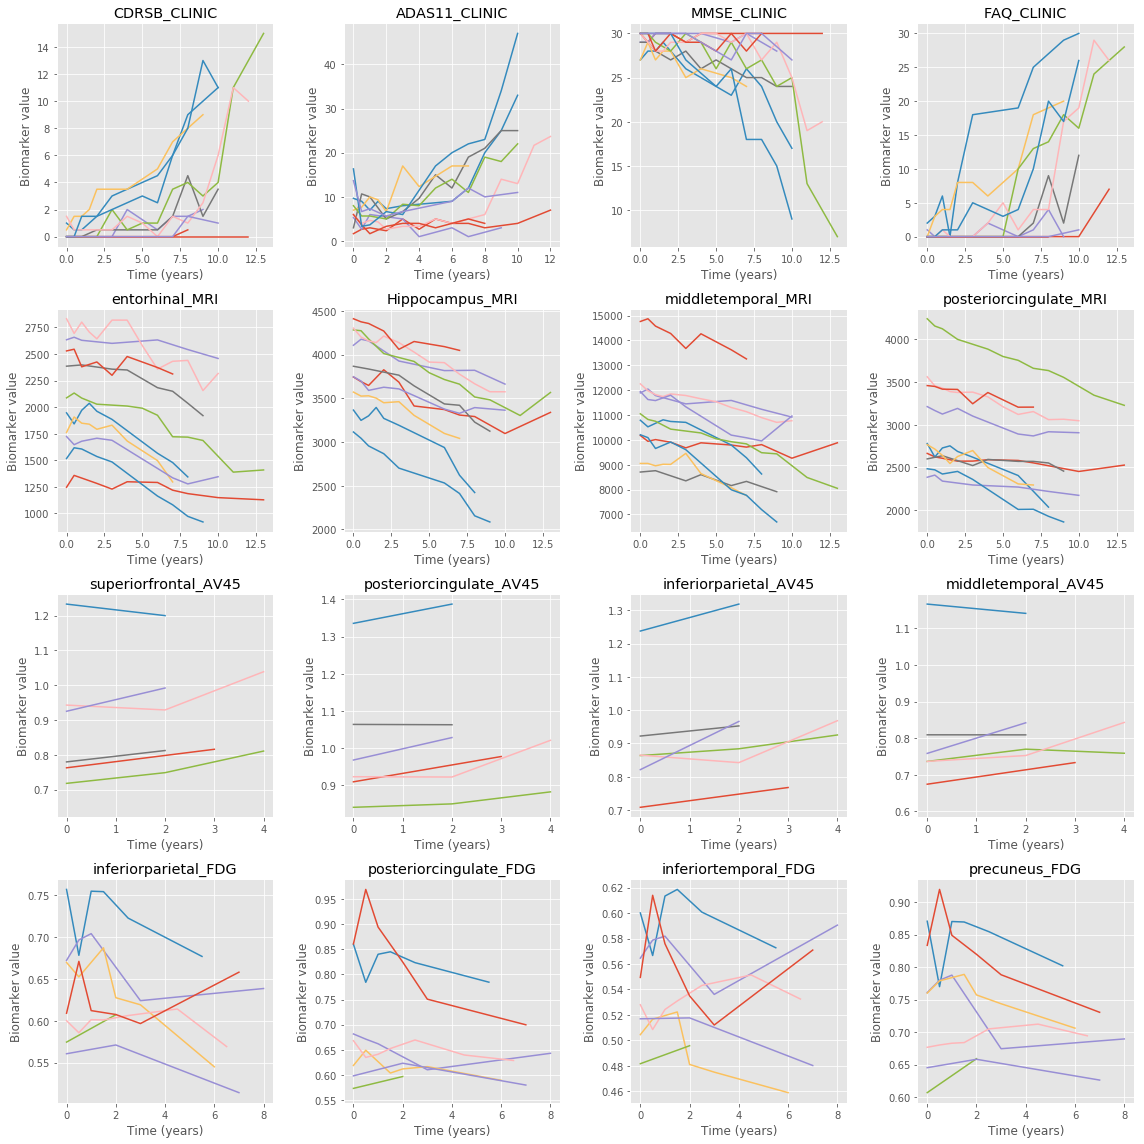

In [4]:
print('We can visualize these longitudinal data for some subjects and some measurements; Each color indicates a subject.')
from simulad.plotting_routines import plot_data

n = 10 #Number of subjects we want to plot; max of 442
plot_data(df, n)
#We recall that ALL subjects have a baseline vist but not necessarily follow-up visits

# The challenge

The question now is the following: How can we learn dynamical relationships between the pathological processes at stake during AD (amyloid deposition, glucose hypometabolism, gray matter atrophy and cognitive decline) based on these longitudinal measurements ?  

To answer this question, we propose to assume the existence of a low-dimensional latent space, in which each coordinate represents a given data modality, and thus its associated pathiological process.
Therefore, from 130 measurements we would end up with a 4-dimensional latent variable $\mathbf{z}(t)$.
Moreover, we hypothesize that these latent coordinates are related by a system of Ordinary Differential Equations (ODEs), thus describing the dynamical relationships between the pathological processes.
Finally, the mapping between the latent space and the data would be done through encoding and decoding functions.
The figure below provides an overview of the model.

![caption](../fig/model_overview.png)

# More formally

## Data modelling

We now give a brief formalization of the method.  

Measures from M data modalities at time t for a given subject i are stored in a matrix $\mathbf{X}_{i}(t) = [\mathbf{x}_{i}^{1}(t), \mathbf{x}_{i}^{2}(t),..., \mathbf{x}_{i}^{M}(t)]^{T}$. It is assumed that these measures are independently generated by a common latent representation $\mathbf{z}_{i}(t)$ of the data such that:

\begin{align}
\begin{split}
\label{eq:generative_model}
p(\mathbf{X}_{i}(t) | \mathbf{z}_{i}(t), \boldsymbol{\sigma^{2}}, \boldsymbol{\psi}) & = \prod_{m} p(\mathbf{x}^{m}_{i}(t) | \mathbf{z}_{i}(t), \sigma^{2}_{m}, \psi_{m}) \\ 
& = \prod_{m}\mathcal{N}(\mu_{m}(\mathbf{z}_{i}(t), \psi_m), \sigma^{2}_{m}), \\
\mathbf{z_{i}}(t) & = \Lambda(\mathbf{z}_{i}(t_{0}), t), \\
\mathbf{z}_{i}(t_{0}) & \sim p(\mathbf{z}_{i}(t_{0})), 
\end{split}
\end{align}
$\sigma^{2}_{m}$ is measurement noise and $\psi_m$ are the parameters of the function $\mu_m$ that allows to compute the different measures of modality m for a subject based on its latent representation. $\Lambda$ is defined as the solution of the following system of ODEs:
\begin{align}
\begin{split}
\label{eq:latent_ode_matrix}
& \frac{d\mathbf{z}(t)}{dt}  = \mathbf{Wz}(t) - \mathbf{Vz}^{2}(t) = g(\mathbf{z}(t), \theta_{ODE}) \text{: where,} \\
& \Big(\mathbf{W}_{i,j} \Big) = \begin{cases} & k_{i} \text{: if i=j,} \\
& \alpha_{i,j} \text{: otherwise;} 
\end{cases}\text{: and :}
\Big(\mathbf{V}_{i,j} \Big) = \begin{cases} & k_{i} \text{: if i=j} \\
& 0 \text{: otherwise,} 
\end{cases} 
\end{split}
\end{align}
where the parameters of the system of ODEs $\theta_{ODE}$ are the entries of the matrices $\mathbf{W}$ and $\mathbf{V}$. This system of ODEs enforces a sigmoidal evolution for each type of modality m, while accounting for the relationship between the different modalities. Based on this system of ODEs and given baseline measures $\mathbf{z}(0)$, the variable $\mathbf{z}(t)$ can be obtained by integration, $\mathbf{z}(t) = \mathbf{z}(0) + \int_{0}^{t}g(\mathbf{z}(x), \theta_{ODE})dx$.

## Model optimization

Parameters' estimation is made by resorting to stochastic variational inference which is commonly used for this type of generative model. This gives us the following mathematical function that we maximize by gradient descent: 
\begin{align}
\begin{split}
\label{eq:lower_bound2}
\mathcal{E} = \sum_{m} E_{q(\mathbf{z}|\mathbf{X})} \Big[ \log p(\mathbf{x}^{m} | \mathbf{z}, \theta_{ODE}, \sigma^{2}_{m}, \psi_{m}) \Big] - \mathcal{D} \Big[q(z^{m}|\mathbf{x}^{m}) | p(z^{m}) \Big],
\end{split}
\end{align}
where $\mathcal{D}$ refers to the Kullback-Leibler (KL) divergence, and $q$ is an approximated posterior distribution that allows to sample values $z^{m}$ for a given data modality $m$ based on the raw measures $\mathbf{x}^{m}$.  
The distribution $q(\mathbf{z}|\mathbf{X})$ is factorized across modalities such that, $q(\mathbf{z}|\mathbf{X}) = \prod_{m} q(z^{m}|\mathbf{x}^{m})$, where $q(z^{m}|\mathbf{x}^{m}) = \mathcal{N}(f(\mathbf{x}^{m}, \phi_{m}^{1}), h(\mathbf{x}^{m}, \phi_{m}^{2}))$, is a variational Gaussian approximation with moments parameterized by the functions $f$ and $h$. This modality-wise encoding of the data enables to interpret each coordinate of $\mathbf{z}$ as a compressed representation of the corresponding modality.

**Objective:** Based on the available longitudinal data, we want to infer the parameters of the encoding and decoding functions, as well as the parameters of the latent dynamical system driving the progression of AD, which will maximize the lower-bound.

**Running the model (optional)**
The cell below allows to run the optimization procedure. To do so set the variable Train to True.
If you wish to skip this step set it to False, execute the cell and keep following the notebook. A pre-trained model will be loaded.

In [5]:
from simulad.Networks import Encoder, Decoder, LatentODEfunc
from simulad.Model import LatentDynamics
from simulad.MiscObjects import Training, Checking
from simulad.data_loading import load_data_training, load_data_checking

torch.manual_seed(1994)

Train = False # Set to True to run the optimizer and learn the model paramters. If set to Fasle jump to the next cell to load the pre-trained model. 

if Train:
    
    print('===Loading data===')
    df_path = './data/data.csv' 
    dx_dict_path = './data/dx' # Provides the clinical status of each subject
    modalities = ['CLINIC', 'MRI', 'FDG', 'AV45']
    time_batches = [(0, 3), (0, 6), (0, 9), (0, 10), (-3, 0), (-6, 0), (-8, 0), (-10, 0), (-12, 0)] #

    batched_data, dx_dict = load_data_training(df_path, dx_dict_path, modalities, time_batches, rename=True) #Prepares the dataframe for optimizing the model

    print('===Setting up model===')
    first_key = list(batched_data.keys())[0]
    modalities_dim = {mod: batched_data[first_key][mod]['follow_up'].size(1) for mod in modalities}

    sigma0 = [0.1 for i in range(len(modalities_dim))]

    encoder = Encoder(modalities_dim) #An encoding function is specified for each data modality
    ode_func = LatentODEfunc(len(modalities_dim), modalities) #The latent system of ODEs
    decoder = Decoder(modalities_dim) # The decoding functions mapping the latent variable to measurements for each modality 

    model = LatentDynamics(encoder, decoder, ode_func, sigma0, len(modalities_dim), modalities) #Set up the model
    model_name = 'SimulAD'

    print('===Start training===')

    if torch.cuda.is_available():
        model.to(device)

    output_dir = './results'
    n_epochs = 7000
    lr = 0.01
    training = Training(n_epochs, lr, model_name, output_dir)
    training.fit_model(model, model_name, batched_data)

Now that we estimated the parameters of the different blocks of our model, how can we use it to simulate the progression of the different biomarkers characteristic of AD ?
First let's load the trained model + the data.

In [6]:
print('===Checking results===')

print('===Load data for testing===')
df_path = './data/data.csv'
dx_dict_path = './data/dx'
modalities = ['CLINIC', 'MRI', 'FDG', 'AV45']

data_per_dx, stats_dict, dx_dict = load_data_checking(df_path, dx_dict_path, modalities, rename=True) # loads data in a different manner to check results

"""data_per_dx is a dictionnary with the following structure:
Clinical status -> Data modality -> Tensor containing the baseline the data for the corresponding subjects.
For instance, data_per_dx['NL']['MRI']['baseline'] gives the baseline values of the regional MRI measurements for the NL subjects
"""

if not Train:

    output_dir = './results'
    if not os.path.isdir('./output_dir'):
        os.mkdir('./output_dir')

    print('===Setting up and loading model===')
    first_key = list(data_per_dx.keys())[0]
    modalities_dim = {mod: data_per_dx[first_key][mod]['baseline'].size(1) for mod in modalities}

    sigma0 = [0.1 for i in range(len(modalities_dim))]
    encoder = Encoder(modalities_dim)
    ode_func = LatentODEfunc(len(modalities_dim), modalities)
    decoder = Decoder(modalities_dim)

    model = LatentDynamics(encoder, decoder, ode_func, sigma0, len(modalities_dim), modalities)
    model_name = 'SimulAD'

    checkpoint = torch.load(output_dir + '/' + model_name)
    model.load_state_dict(checkpoint)
    
checking = Checking(model, data_per_dx, dx_dict, stats_dict, output_dir)
#The checking object contains a number of methods allowing to use the model once trained.

if not os.path.isdir('./results'):
    os.mkdir('./results')

===Checking results===
===Load data for testing===
===Setting up and loading model===


First let's try to see how the different z-scores evolve in time.  
The temporal profile of each latent coordinate would represent the overall evolution of the corresponding pathological process.  

How do we do that ?  
If we consider subjects diagnosed with AD dementia we can assert that years before these subject were healthy. Therefore we propose to project the baseline data of all the subjects diagnosed with AD dementia in the latent space. Based on this set of latent variables we fit a Gaussian Mixture Model which should allow us to sample typical abnormal values in the latent space. These values will be used as an intial condition for our system of latent ODEs. Then we integrate forward and backward and can obtain long-term trajectories for the different z-scores. 

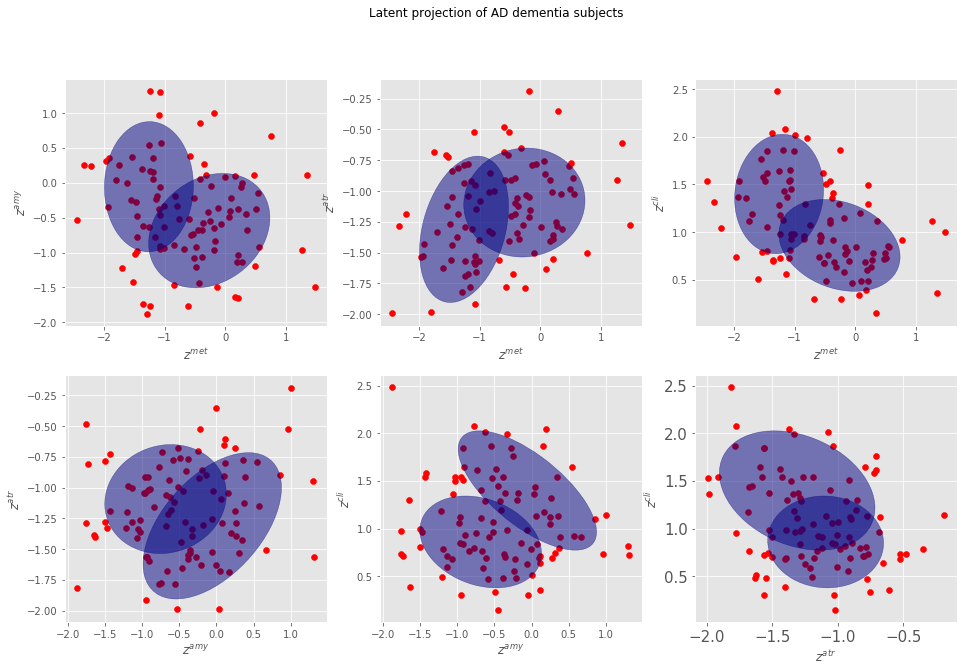

In [7]:
DX = 'AD dem'

"""We fit a Gaussian Mixture Model on the latent projection of the AD dementia subjects."""
gmm = checking.fit_and_select_gmm(data_per_dx[DX])

"""We define how long we want to integrate the latent system of ODEs forward (time_pos) and backward (time_neg)
based on an intial latent condition sampled from the fitted GMM."""

time_pos = torch.linspace(0., 9., 100)
time_neg = torch.linspace(0., -21., 200)

"""Sampling from the GMM; n is the number of samples we draw from the GMM. 
Integration of the latent system of ODEs forward and backward;
The tensor sampled_z_trajectories gives all the estimated latent progression depending on the n intial condition drawn from the gmm.
avg_z_trajectories gives the average evolution of each z-score +/- standard deviation."""

n = 100
sampled_z_trajectories, avg_z_trajectories = checking.latent_trajectory_gmm(gmm, n, time_pos, time_neg)

"""We store the estimated disease severity of all the subjects in a dictionnary (time_shift) where the values are given for each clinical group.
We also return the timeline array along which the trajectories of the z-scores will be plotted. """

time_shift, timeline = checking.pseudo_time_shift(avg_z_trajectories, time_pos, time_neg, 'estimated_disease_severity')

## Latent disease progression

We now plot the evolution of each z-score over time.
It is important to note that each z-score can be seen as a quantity summarizing the overall pathological status of neuroathological process (i.e amyloid deposition or gray matter atrophy).

## Estimated disease severity

Based on the trajectory that we obtain for each z-score we can use it as a reference to estimate the disease severity of each subject. We project the measures $\mathbf{X}$ of a given subject at baseline, and estimate the time-point $\tau$ minimizing the distance between its latent projection and the reference trajectory.

\begin{align}
\begin{split}
\label{eq:time_shift}
\tau & = argmin_{t} ||f(\mathbf{X}, \boldsymbol{\phi}^{1}) - \mathbf{z}(t)||_{1} \\
& = \sum_{m}|f(\mathbf{x}^{m}, \phi^{1}) - z^{m}(t)|.
\end{split}
\end{align}

We show below the distribution of the values of the estimated disease severity for the 442 subjects of the cohort depending on their clinical status.

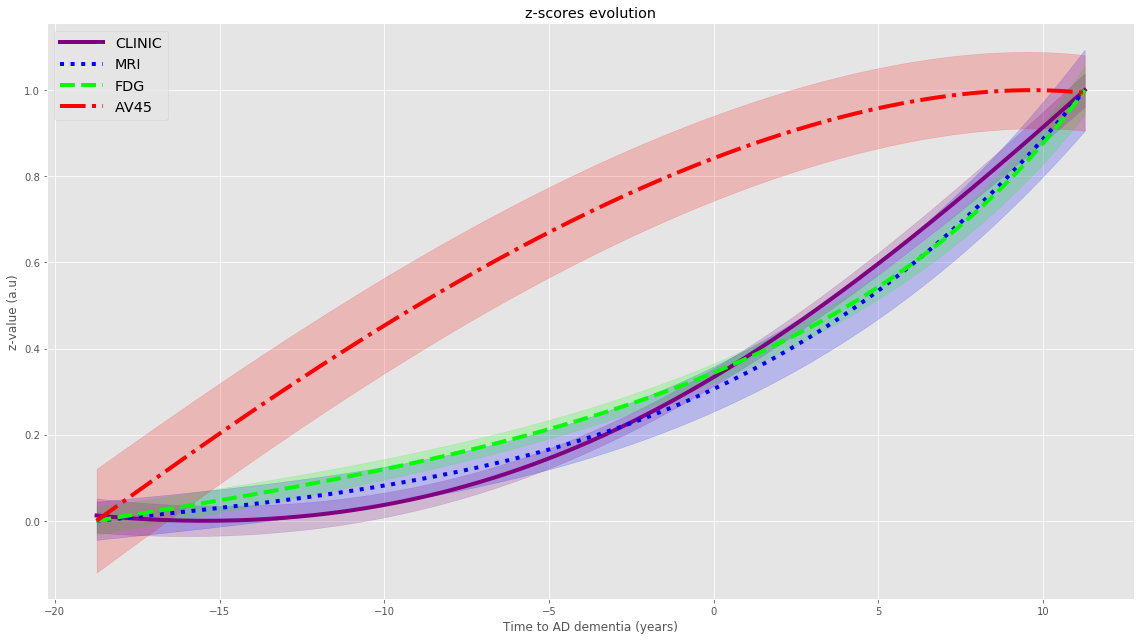

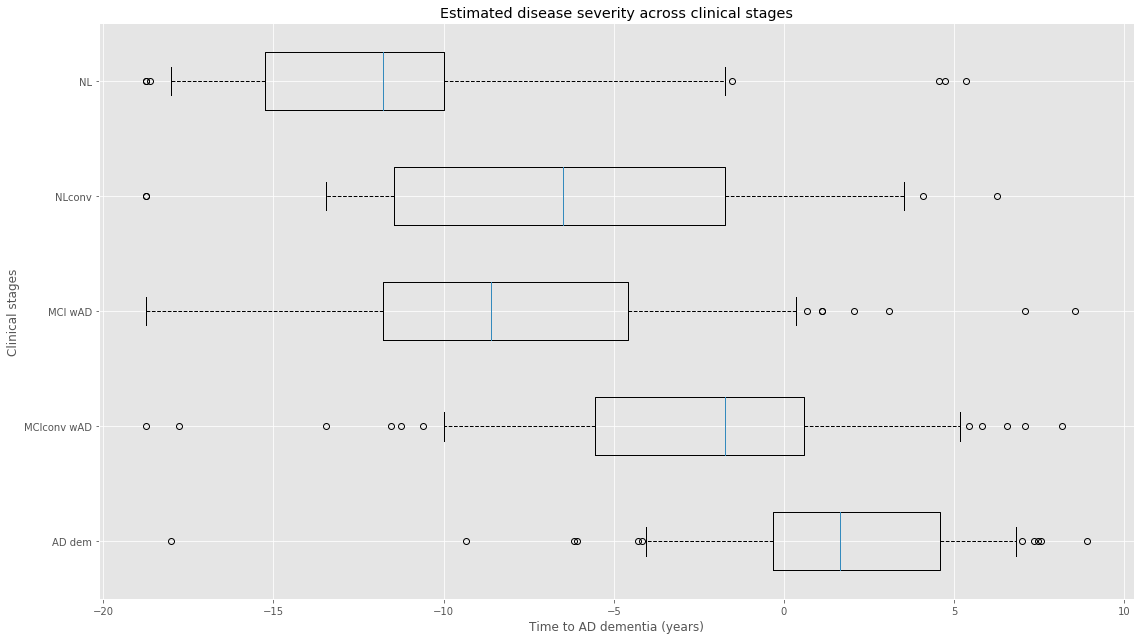

In [8]:
from simulad.plotting_routines import boxplot_time_shift, plot_latent_trajectory

#Trajectories of the different z-scores over time
plot_latent_trajectory(avg_z_trajectories, timeline, modalities, 'Latent disease progression')

#Plot the distirbution of the estimated disease severity depending on clinical group
boxplot_time_shift(time_shift, 'disease_severity')

## Global disease progression

Based on the trajectories estimated for each z-scores and the decoding functions $\mu_{m}$, we can estimate the values of the clinical scores and regional measurements of gray matter atrophy, glucose metabolism and amyloid at each time point. 

In [9]:
"""This method will compute the values of the clinical scores and regional measurements at each point based on the reference latent trajectory
It will output a csv file containing the predicted regional measurements for each imaging modality and at each time point.
This csv is generated such that it can be used as an input to the brain painter software (https://github.com/razvanmarinescu/brain-coloring) to create brain images.
We show below the results obtained based on the model trained in the original paper."""

checking.data_space_trajectory(avg_z_trajectories, timeline)

![Title](../fig/ad_progression.png)

## Simulating drug intervention

We consider the average latent progression of the disease $\mathbf{z}(t)$ and want to investigate how this model of progression would be affected by a potential drug intervention performed starting from a given time point t. To do so, we propose to simulate the effect of an hypothetical intervention on the disease progression, by modulating the vector $\frac{d\mathbf{z}(t)}{dt}$ after each integration step such that:

\begin{align}
\begin{split}
\label{eq:simulation}
\Big(\frac{d\mathbf{z}(t)}{dt} \Big)^{*} = \boldsymbol{\Gamma}\frac{d\mathbf{z}(t)}{dt} \text{ where, } \boldsymbol{\Gamma} = 
\begin{pmatrix}
\gamma_{1} & & \\
& \ddots & \\
& & \gamma_{m} \\
\end{pmatrix}.
\end{split}
\end{align}

The values $\gamma_{m}$ are fixed between $0$ and $1$, allowing to control the influence of the corresponding modalities on the system evolution, and to create hypothetical scenarios of evolution. For example, for a 100\% (resp. 50\%) amyloid lowering intervention we set $\gamma_{amy} = 0$ (resp. $\gamma_{amy} = 0.5$).

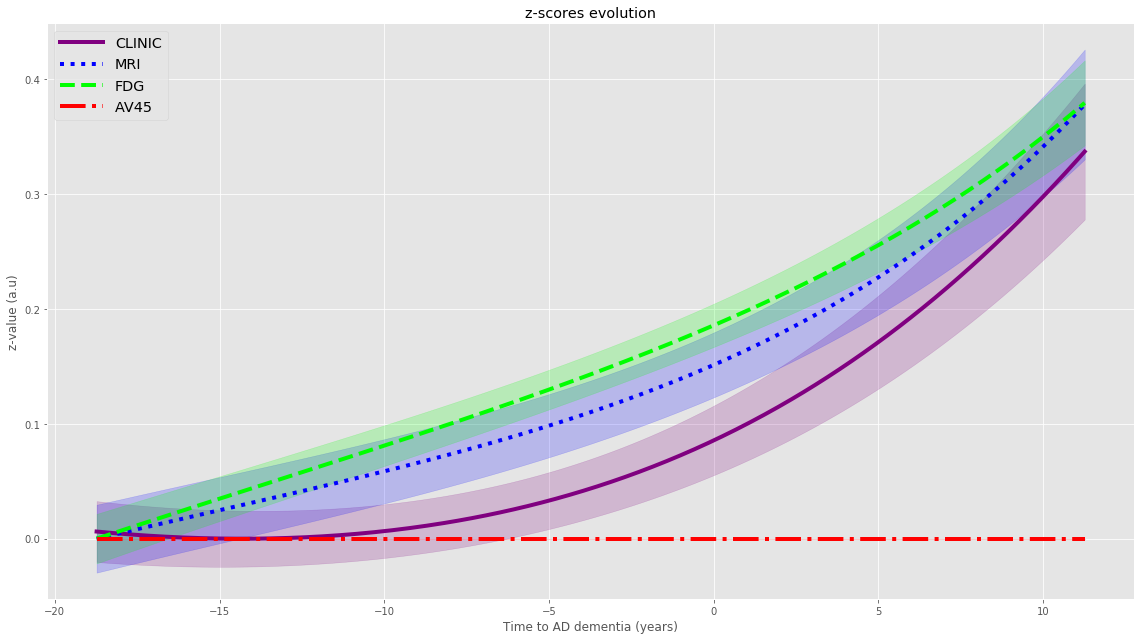

In [10]:
"""Effect of drug intervention on the disease progression"""
#the derivative of a given modality is modulated by a factor gamma at each integration step.
#we show the example of the effect of an amyloid intervention in which its accumulation is stopped

# gamma_amy = 0 --> no amyloid accumulation; gamma_amy = 0.5 --> amyloid accumulates twice slower than in the normal case.
gamma_amy = 0.0
model.latent_ode.set_ratio(gamma_amy)

#specifiy the modality to block; here AV45 to target amyloid deposition
modality_to_block = 'AV45'
model.latent_ode.set_blocked_modality(modality_to_block)

#We need to choose the time at which the intervention starts.
intervention_time = -21.

z_trajectories_av45_intervention = checking.block_amyloid(sampled_z_trajectories, time_pos, time_neg, intervention_time)

#to normalize the obtained trajectories with respect to the ones obtained in the placebo case where no intervention is performed
max_z = np.max(np.mean(sampled_z_trajectories.detach().numpy(), axis=0), axis=0)
min_z = np.min(np.mean(sampled_z_trajectories.detach().numpy(), axis=0), axis=0)

plot_latent_trajectory(z_trajectories_av45_intervention, timeline, modalities, f'Amyloid_intervention_(gamma_amy = {gamma_amy})', (min_z, max_z))

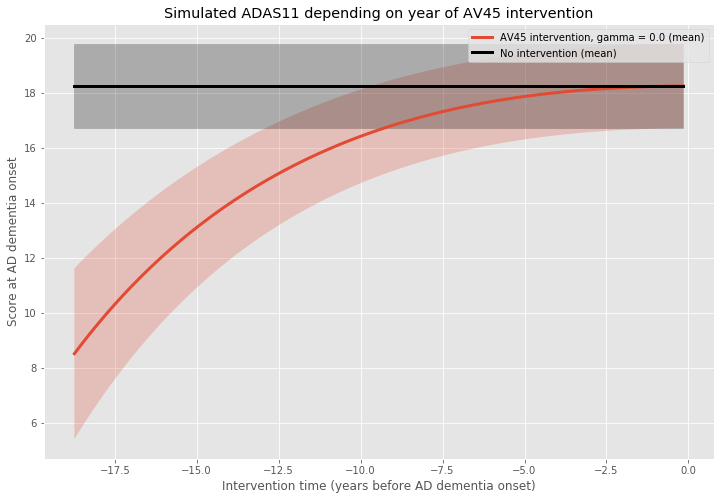

In [11]:
"""Effect of drug intervention on clinical outcomes"""

#Modality on which intervention is simulated
modality_to_block = 'AV45'
model.latent_ode.set_blocked_modality(modality_to_block)

#Lowering rate
gamma_amy = 0.
model.latent_ode.set_ratio(gamma_amy)

#Score on which intervention effect is observed
#List of possible score: ADAS11, MMSE, FAQ, CDRSB, RAVLT immediate, RAVLT learning, RAVLT forgetting
score = 'ADAS11'

#Number of cases per arm
n = 100

#Creates a dataframe called amyloid_intervention.
#It contains comparisons (p-values, statistical power, effect size) between placebo and intervention scenarios for each clinical score
#depending on the year of simulated intervention.
df_av45_intervention = checking.drug_intervention(gmm, time_pos, time_neg, n, 'amyloid_intervention')

from simulad.plotting_routines import plot_intervention_effect
plot_intervention_effect(df_av45_intervention, score, modality_to_block, gamma_amy, 'effect_av45_intervention_adas11')